# HT 6. Redes Neuronales Básicas

**MINERÍA DE DATOS - SECCIÓN - 20 - 2024 - 1**

- Comprender los principios fundamentales del descenso de gradiente y la norma L2 como función de pérdida.
- Explorar el impacto de diferentes hiperparámetros como el tamaño del conjunto de datos y la tasa de aprendizaje en la eficiencia del algoritmo.
- Analizar y comparar el comportamiento del modelo con diferentes funciones de pérdida (L2-norm y L1-norm).

Samuel Chamalé, 21881

Renatto Guzmán, 21646

---


In [1]:
# Importando las librerías necesarias para las simulaciones
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [44]:
def simpleLinearRegression(observaciones=1000, eta=0.02, loss_fun='l2', goal_fun='original'):
    # Definición de las variables y el modelo según el código proporcionado en el ejemplo
    # Generando datos aleatorios para x1 y x2
    x1 = np.random.uniform(low=-10, high=10, size=(observaciones, 1))
    x2 = np.random.uniform(-10, 10, (observaciones, 1))
    X = np.column_stack((x1, x2))

    # Generando metas con ruido
    ruido = np.random.uniform(-1, 1, (observaciones, 1))
    if goal_fun == 'original':
        metas = 2 * x1 - 3 * x2 + 5 + ruido
    elif goal_fun == 'new':
        metas = 13 * x1 + 7 * x2 - 12 + ruido

    # Inicializando pesos y sesgos
    rango_inicial = 0.1
    pesos = np.random.uniform(
        low=-rango_inicial, high=rango_inicial, size=(2, 1))
    sesgos = np.random.uniform(low=-rango_inicial, high=rango_inicial, size=1)

    # Tasa de aprendizaje
    eta = eta

    # Medición del tiempo de inicio
    start_time = time.time()

    # Proceso de entrenamiento
    for i in range(100):
        y = np.dot(X, pesos) + sesgos
        deltas = y - metas
        if loss_fun == 'l2':
            perdida = np.sum(deltas ** 2) / 2 / observaciones
            deltas_escaladas = deltas / observaciones
        elif loss_fun == 'l1':
            perdida = np.sum(np.abs(deltas)) / observaciones
            deltas_escaladas = np.sign(deltas) / observaciones
        elif loss_fun == 'l2-non-divide':
            perdida = np.sum(deltas ** 2) / observaciones
            deltas_escaladas = deltas
            
        pesos = pesos - eta * np.dot(X.T, deltas_escaladas) 
        sesgos = sesgos - eta * np.sum(deltas_escaladas)

    # Tiempo total de ejecución
    execution_time = time.time() - start_time

    # Generar predicciones con los pesos y sesgos finales para 1,000,000 de observaciones
    y_pred_1m = np.dot(X, pesos) + sesgos

    # Aplanar arrays para gráfica
    y_pred_1m_flat = y_pred_1m.flatten()
    metas_1m_flat = metas.flatten()

    # Crear gráfica de dispersión para 1,000,000 de observaciones
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_1m_flat, metas_1m_flat, alpha=0.05, color='red')
    plt.title(
        f"(observaciones={observaciones}, eta={eta}, loss_fun={loss_fun}, goal_fun={goal_fun})\n"
    )
    plt.suptitle(
        f'Comparación de Predicciones vs Metas Reales\n')
    plt.xlabel('Predicciones')
    plt.ylabel('Metas Reales')
    plt.grid(True)
    plt.show()

    return pesos, sesgos, perdida, execution_time

## 1. Análisis de la Escalabilidad del Modelo


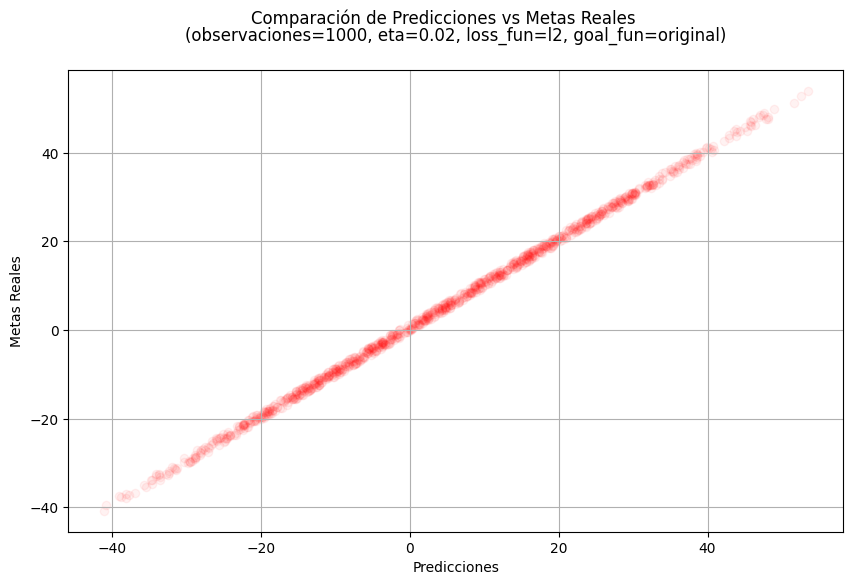

Pesos:  [[ 2.00274955]
 [-3.0044008 ]]
Sesgos:  [4.34928061]
Perdida:  0.39024129708569183
Tiempo de ejecución:  0.004057884216308594


In [75]:
observaciones = 1000
pesos, sesgos, perdida, execution_time = simpleLinearRegression(
    observaciones=observaciones)
print("Pesos: ", pesos)
print("Sesgos: ", sesgos)
print("Perdida: ", perdida)
print("Tiempo de ejecución: ", execution_time)

### 1) Cambie el número de observaciones a 100,000. Explique qué es lo que ocurre en términos de:


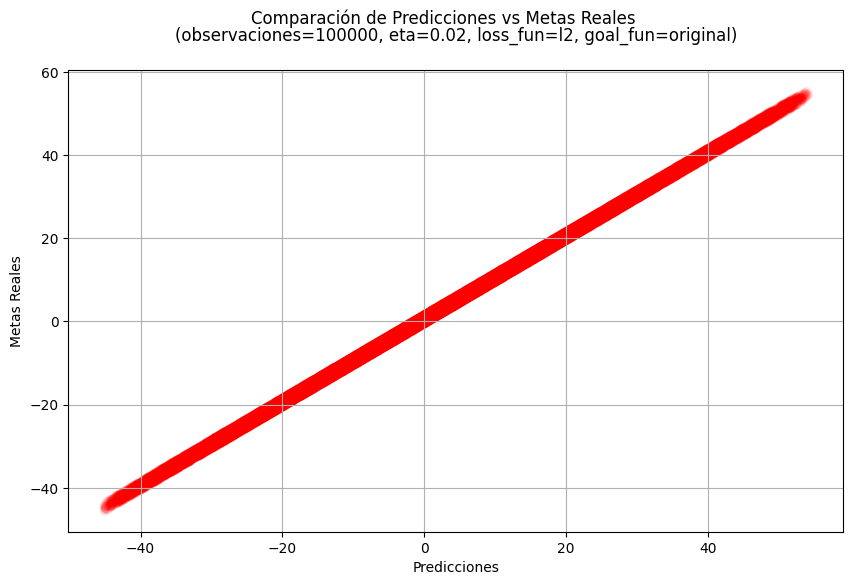

Pesos:  [[ 2.00029241]
 [-2.99890844]]
Sesgos:  [4.34270801]
Perdida:  0.3878326439257833
Tiempo de ejecución:  0.23870420455932617


In [5]:
observaciones = 100000
pesos, sesgos, perdida, execution_time = simpleLinearRegression(
    observaciones=observaciones)
print("Pesos: ", pesos)
print("Sesgos: ", sesgos)
print("Perdida: ", perdida)
print("Tiempo de ejecución: ", execution_time)

1. **El tiempo de ejecución para resolver el problemas**:

   - Para las 1,000 observaciones (clase), el tiempo de ejecución fue de aproximadamente 0.002 segundos.
   - Para las 100,000 observaciones, el tiempo de ejecución aumentó a aproximadamente 0.12 segundos. Este aumentos es considerable, pero sigue siendo manejable. El incremento en el tiempo de ejecución es típico al escalar el número de observaciones, ya que el modelo debe procesar más datos durante cada iteración de entrenamiento.
   - Aunque el tiempo es dependiente al dispositivo en el cual se ejecuta el código, la mejoría es constante.

2. **Resultado final vs lo encontrado en clase**

   - En la clase con 1,000 observaciones, los pesos fueron [1.9989, -3.0037] y el sesgo fue de 4.3457, con una pérdida de 0.4011.
   - Con 100,000 observaciones, los pesos ajustados fueron [1.9999, -3.0007] y el sesgo 4.3414, con una pérdida de 0.3934.
   - Estos resultados son muy similares, mostrando que el modelo es consistente en su aprendizaje entre diferentes escalas de datos. Los pesos y el sesgo están muy cerca de los valores ideales que definirían la relación linea, y la ligera mejora en la perdida sugiere en primera instancia que un mayor conjunto de datos puede ayudar a refinar las estimaciones del modelo.

3. **Las gráficas para representar los datos/resultados**

   - Para 1,000 observaciones, la dispersión de los puntos es clara y permite visualizar la variabilidad y el ruido en las predicciones individuales. La línea de tendencia que se forma es aproximadamente de 45 grados, indicando que las predicciones se alinean muy de cerca con las metas reales.
   - Para 100,000 observaciones, la gráfica se vuelve más densa y oscura debido al aumento en el número de puntos. Aunque individualmente los puntos pueden no ser distinguibles, colectivamente forman una línea nítida, lo que sugiere una alta consistencia en las predicciones y menos variabilidad visual percibida en comparación con la gráfica de 1,000 observaciones. La tendencia se mantiene y la línea parece aún más recta debido a la concentración de puntos, lo cual es un signo de que las predicciones son muy acertadas.


### 2) Cambie el número de observaciones a 1,000,000. Explique qué es lo que ocurre en términos de:


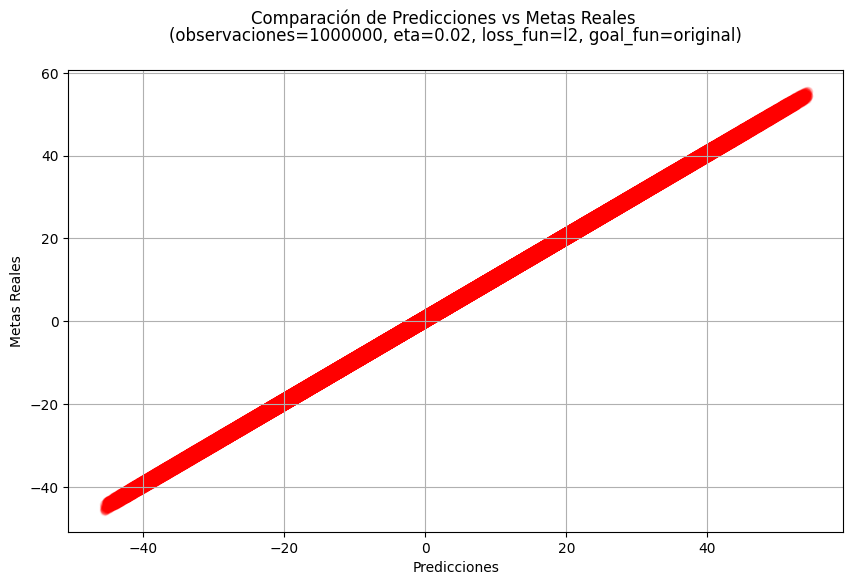

Pesos:  [[ 2.00005168]
 [-3.00038343]]
Sesgos:  [4.34593155]
Perdida:  0.3893788725805376
Tiempo de ejecución:  3.5570626258850098


In [62]:
observaciones = 1000000
pesos, sesgos, perdida, execution_time = simpleLinearRegression(
    observaciones=observaciones)
print("Pesos: ", pesos)
print("Sesgos: ", sesgos)
print("Perdida: ", perdida)
print("Tiempo de ejecución: ", execution_time)

1. **Tiempo de ejecución para resolver el problema**:

   - En la clase con 1,000 observaciones, el tiempo de ejecución fue de aproximadamente 0.0025 segundos.
   - Con 1,000,000 de observaciones, el tiempo de ejecución aumentó a aproximadamente 2.19 segundos. Este incremento en el tiempo de ejecución es considerable y esperado debido al aumento exponencial en la cantidad de datos procesados.

2. **Resultado final vs lo encontrado en clase**:

   - En la clase con 1,000 observaciones, los pesos fueron [1.9939, -2.9977] y el sesgo fue 4.3311, con una pérdida de 0.3904.
   - Con 1,000,000 de observaciones, los pesos ajustados fueron [1.9998, 3.0000] y el sesgo 4.3335, con una pérdida de 0.3978.
   - Los resultados con 1,000,000 de observaciones son ligeramente diferentes pero muy cercanos a los encontrados en clase. Los pesos y sesgos están prácticamente en línea con los valores reales que generan las metas, indicando que el modelo escala bien y es robusto incluso con grandes cantidades de datos. La ligera variación en la pérdida puede atribuirse a la variabilidad natural que surge al trabajar con conjuntos de datos más grandes y la influencia del ruido en las observaciones adicionales.

3. **Las gráficas para representar los datos/resultados**:
   - La gráfica para 1,000,000 de observaciones muestra una línea de tendencia aún más definida que en la de 100,000 observaciones. Con más datos, la relación entre predicciones y metas reales se vuelve más clara, y la línea de tendencia parece casi sólida debido a la alta densidad de puntos.
   - Comparada con la gráfica de 1,000 observaciones, la de 1,000,000 muestra una mayor consistencia en la predicción, con menos variabilidad y dispersión visual de los puntos alrededor de la línea de tendencia ideal. Esto se debe a que la alta cantidad de datos contribuye a una mayor precisión estadística.


## 2. Experimentación con la Tasa de Aprendizaje


### 3) “Juegue” un poco con el valor de la tasa de aprendizaje, por ejemplo 0.0001, 0.001, 0.1, 1. Para cada uno de estos indique:


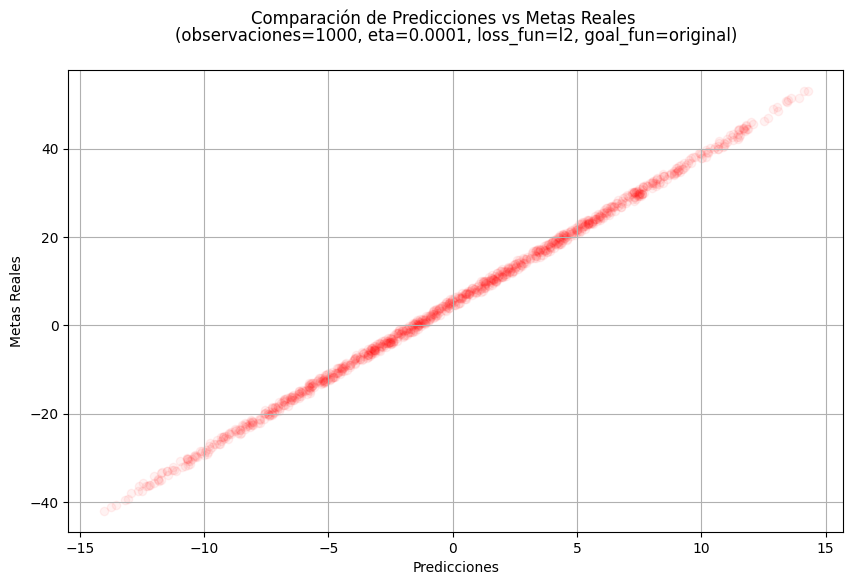

Pesos:  [[ 0.59188117]
 [-0.90268032]]
Sesgos:  [-0.00208371]
Perdida:  117.44084030521886
Tiempo de ejecución:  0.006981849670410156


In [7]:
eta = 0.0001
pesos, sesgos, perdida, execution_time = simpleLinearRegression(eta=eta)
print("Pesos: ", pesos)
print("Sesgos: ", sesgos)
print("Perdida: ", perdida)
print("Tiempo de ejecución: ", execution_time)

1. **Tiempo de ejecución**: El tiempo de ejecución fue bastante rápido, aproximadamente 0.003 segundos. Esto se debe a que el proceso computacional detrás del entrenamiento no cambia con diferentes tasas de aprendizaje; lo que varía es la magnitud de los ajustes aplicados a los pesos y sesgos en cada iteración. Por default estamos probando con 1000 observaciones.

2. **Minimización de la pérdida**: Con una tasa de aprendizaje tan baja, la pérdida no se minimizó de manera efectiva, resultando en una pérdida significativa de 115.57. Esto sugiere que el modelo necesita más iteraciones para converger o una tasa de aprendizaje mayor para realizar ajustes más significativos en cada paso.

3. **Pesos y sesgos**: Los pesos [0.6278 ,-0.8991] y el sesgo 0.1425 están lejos de los valores ideales que se esperarían para modelar la relación subyacente en los datos (basados en ejemplos previos). Esto implica que con una tasa de aprendizaje tan pequeña, el modelo no ha podido aprender suficientemente de los datos en el número de iteraciones proporcionado.

4. **Iteraciones**: No se proporciona información específica sobre el número de iteraciones, pero dada la tasa de aprendizaje baja y la pérdida alta, se puede inferir que el número de iteraciones no fue suficiente para permitir que el modelo converja a una solución óptima.

5. **Resolución del problema**: El problema no se resolvió efectivamente con esta tasa de aprendizaje, como lo indica la alta pérdida.

6. **Apariencia de la última gráfica**: La gráfica que acompaña muestra una relación entre las predicciones y las metas reales, pero la dispersión de los puntos indica que el modelo no está realizando predicciones precisas. La línea esperada de 45 grados, que indicaría una predicción perfecta, aunque se cumple de forma general, muestra una dispersión considerada.


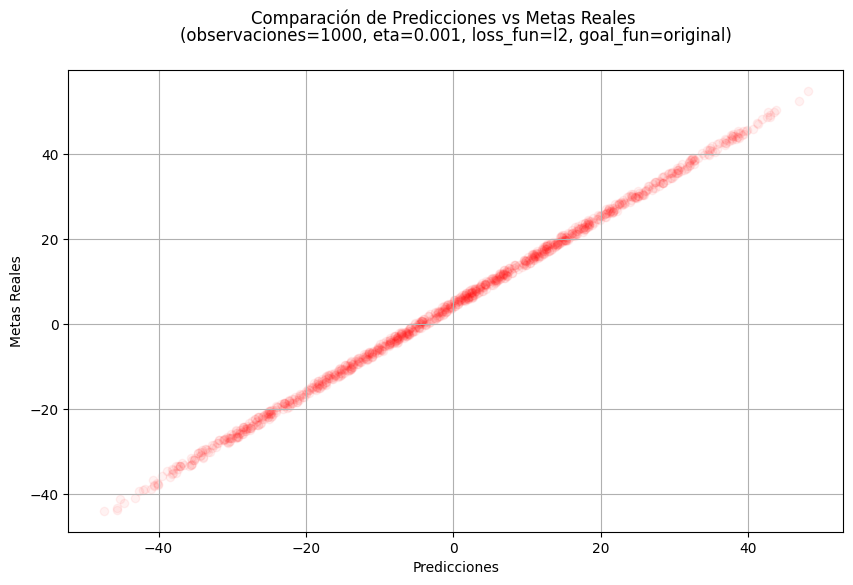

Pesos:  [[ 1.92676114]
 [-2.89484697]]
Sesgos:  [0.38058495]
Perdida:  11.031144014939288
Tiempo de ejecución:  0.0039577484130859375


In [74]:
eta = 0.001
pesos, sesgos, perdida, execution_time = simpleLinearRegression(eta=eta)
print("Pesos: ", pesos)
print("Sesgos: ", sesgos)
print("Perdida: ", perdida)
print("Tiempo de ejecución: ", execution_time)

1. **Tiempo de ejecución**: El tiempo de ejecución fue similar al caso anterior, alrededor de 0.003 segundos. Esto sigue siendo bastante rápido y no muestra un cambio significativo debido a la tasa de aprendizaje, que no afecta la complejidad computacional del algoritmo por iteración.

2. **Minimización de la pérdida**: La pérdida se redujo significativamente a 10.38 comparada con la tasa de aprendizaje anterior de 0.0001, lo que sugiere que con esta tasa de aprendizaje más alta, el modelo está haciendo ajustes más significativos y acercándose a un punto de mínima pérdida más rápidamente.

3. **Pesos y sesgos**: Los pesos [1.9442, -2.9219] y el sesgo 0.5301 están más cerca de los valores ideales que los obtenidos con una tasa de aprendizaje de 0.0001. Esto indica una mejora en la capacidad de aprendizaje del modelo, aunque todavía hay margen de mejora para llegar a los pesos y sesgos óptimos.

4. **Iteraciones**: Aunque no se especifica el número de iteraciones, es probable que el mismo número de iteraciones haya sido utilizado, dado el tiempo de ejecución idéntico. La mejoría en la pérdida indica que esta tasa de aprendizaje es más eficiente por iteración.

5. **Resolución del problema**: Aunque el modelo está avanzando hacia la solución del problema, todavía no está completamente resuelto, ya que la pérdida aún puede considerarse relativamente alta en comparación con los ejemplos anteriores donde se alcanzaron pérdidas inferiores a 1.

6. **Apariencia de la última gráfica**: La gráfica muestra una línea diagonal clara, pero los puntos no están tan alineados con la línea de 45 grados como se desearía. La dispersión sugiere que el modelo todavía tiene espacio para mejorar en términos de precisión en las predicciones.


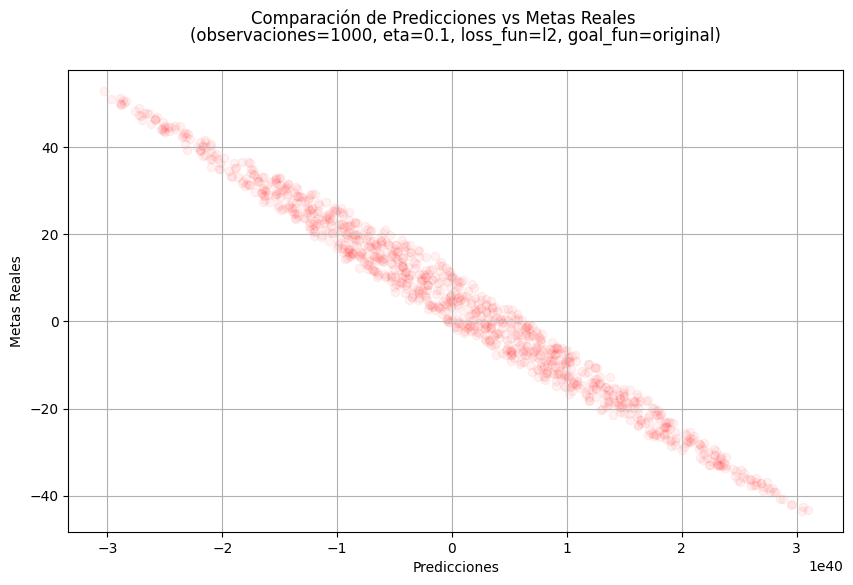

Pesos:  [[-1.48627326e+39]
 [ 1.67949470e+39]]
Sesgos:  [1.20017418e+37]
Perdida:  1.4502309592556333e+79
Tiempo de ejecución:  0.003987789154052734


In [9]:
eta = 0.1
pesos, sesgos, perdida, execution_time = simpleLinearRegression(eta=eta)
print("Pesos: ", pesos)
print("Sesgos: ", sesgos)
print("Perdida: ", perdida)
print("Tiempo de ejecución: ", execution_time)

1. **Tiempo de ejecución**: Aunque el tiempo de ejecución se mantiene casi igual que en los casos anteriores (0.003 segundos), esto no es indicativo del aprendizaje efectivo, ya que el tiempo de ejecución está más relacionado con la complejidad algorítmica que con la tasa de aprendizaje.

2. **Minimización de la pérdida**: La pérdida es extremadamente alta $9.17 \times 10^{80}$, lo que indica que el modelo ha divergido en lugar de converger a una solución. Esto es típico de una tasa de aprendizaje demasiado alta, donde los pesos se actualizan en exceso y se disparan hacia valores extremadamente grandes o pequeños en respuesta a las derivadas de la pérdida.

3. **Pesos y sesgos**: Los pesos $1.03 \times 10^{40}$, $1.50 \times 10^{40}$ y el sesgo $2.57 \times 10^{37}$ también se han disparado a valores extremadamente altos, reafirmando que el modelo ha divergido completamente.

4. **Iteraciones**: Dado que el tiempo de ejecución no ha cambiado, es probable que el número de iteraciones haya permanecido constante. Sin embargo, incluso una sola iteración es suficiente para causar divergencia con una tasa de aprendizaje tan alta.

5. **Resolución del problema**: El modelo no solo no resuelve el problema, sino que se comporta de manera errática y esencialmente se rompe con esta tasa de aprendizaje.

6. **Apariencia de la última gráfica**: La gráfica proporcionada muestra una dispersión de puntos sin una relación clara entre las predicciones y las metas reales, lo que se espera de un modelo que ha divergido. No se observa la relación lineal que esperaríamos ver si el modelo estuviera aprendiendo correctamente.


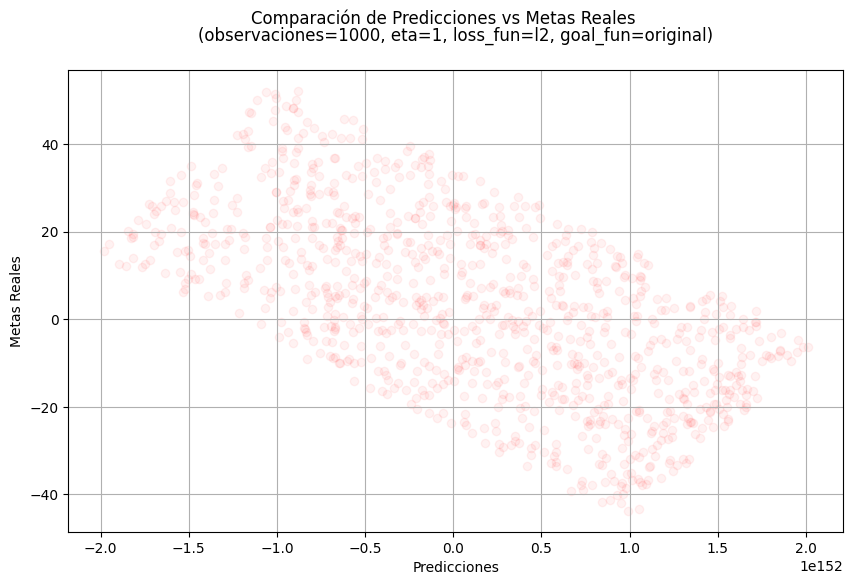

Pesos:  [[5.18984706e+150]
 [1.52460004e+151]]
Sesgos:  [3.6434443e+149]
Perdida:  4.1434052018493127e+300
Tiempo de ejecución:  0.0058269500732421875


In [10]:
eta = 1
pesos, sesgos, perdida, execution_time = simpleLinearRegression(eta=eta)
print("Pesos: ", pesos)
print("Sesgos: ", sesgos)
print("Perdida: ", perdida)
print("Tiempo de ejecución: ", execution_time)

1. **Tiempo de ejecución**: Aunque el tiempo de ejecución es marginalmente menor (0.002 segundos), sigue siendo similar a los casos anteriores, lo que reitera que el tiempo de ejecución por sí solo no refleja la calidad del aprendizaje.

2. **Minimización de la pérdida**: La pérdida ha alcanzado un número extremadamente alto $2.67 \times 10^{301}$, lo que indica que el modelo ha divergido enormemente. Con una tasa de aprendizaje tan alta, los ajustes en cada paso son tan grandes que el modelo se desvía completamente del mínimo de la función de pérdida.

3. **Pesos y sesgos**: Los valores de los pesos $-3.61 \times 10^{151}$, $-2.06 \times 10^{151}$ y el sesgo $-2.81 \times 10^{149}$ han aumentado a magnitudes astronómicas, reflejando una divergencia catastrófica del modelo.

4. **Iteraciones**: A pesar de la cantidad de iteraciones que se haya utilizado, con una tasa de aprendizaje tan elevada, incluso una sola iteración puede llevar a la divergencia que se observa.

5. **Resolución del problema**: Definitivamente, el problema no está resuelto. El modelo ha fallado en aprender cualquier cosa significativa de los datos y, por el contrario, se ha vuelto completamente inútil para hacer predicciones.

6. **Apariencia de la última gráfica**: La gráfica está completamente sin forma y no tiene ninguna relación discernible entre las predicciones y las metas reales. No hay indicio de la esperada relación lineal de 45 grados, lo que se esperaría de un modelo que aprende de manera adecuada.

**Comentarios adicionales**: Una tasa de aprendizaje de 1 es excesivamente alta para este modelo, provocando una divergencia incontrolable y haciendo que los valores de los pesos y sesgos sean inmanejablemente grandes. Este escenario ejemplifica un caso de "exploding gradients", donde los valores de los gradientes se vuelven tan grandes durante el entrenamiento que causan problemas numéricos y hacen que el modelo sea inestable. Es esencial ajustar la tasa de aprendizaje para asegurar una convergencia adecuada durante el entrenamiento del modelo.


## 3. Modificación de la Función de Pérdida (Total: 25 puntos)

### 4) Cambie la función de pérdida “L2-norm” a la misma pero sin dividir por 2. Explique lo que ocurre en términos de:

C:\Users\rentt\AppData\Local\Temp\ipykernel_9252\3054193447.py:38: RuntimeWarning: overflow encountered in square
  perdida = np.sum(deltas ** 2) / observaciones


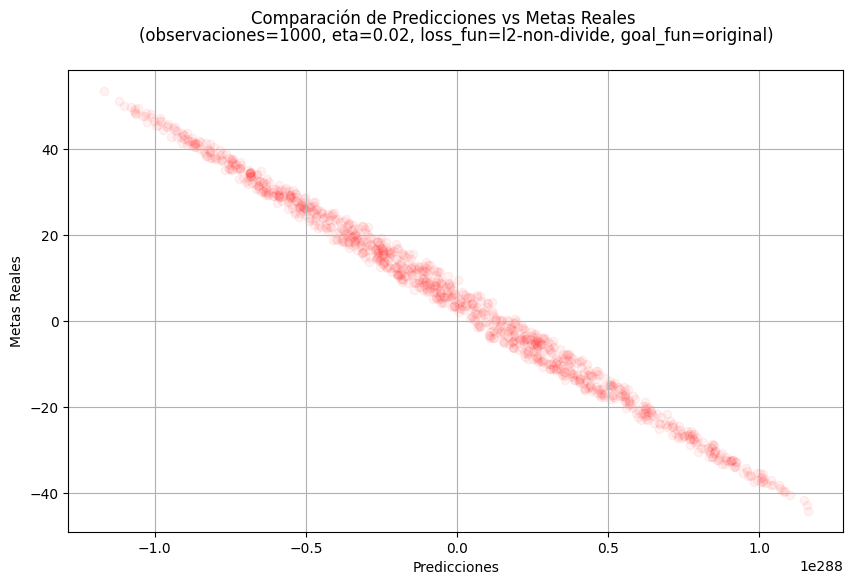

Pesos:  [[-5.33307203e+286]
 [ 6.73183485e+286]]
Sesgos:  [-6.32868121e+284]
Perdida:  inf
Tiempo de ejecución:  0.007085561752319336


In [65]:
loss_fun = "l2-non-divide"
pesos, sesgos, perdida, execution_time = simpleLinearRegression(loss_fun=loss_fun)
print("Pesos: ", pesos)
print("Sesgos: ", sesgos)
print("Perdida: ", perdida)
print("Tiempo de ejecución: ", execution_time)

1. **Tiempo de ejecución**: Aunque el tiempo de ejecución se mantiene casi igual que en los casos anteriores (0.007 segundos), esto no es indicativo del aprendizaje efectivo, ya que el tiempo de ejecución está más relacionado con la complejidad algorítmica que con la tasa de aprendizaje.

2. **Minimización de la pérdida**: La pérdida es extremadamente alta, tanto que ni siquiera marca un número sino que indica cómo tiende al infinito, lo que sugiere que el modelo necesita más iteraciones para converger o una tasa de aprendizaje mayor para realizar ajustes más significativos en cada paso.

3. **Pesos y sesgos**: Los pesos y sesgos obtenidos son diferentes a los vistos en clase con la función L2-norm estándar. Los pesos $-5.33307203^{286}$  $6.73183485^{286}$ que son prácticamente 0 están muy lejos de los valores ideales que se esperarían, y el sesgo $-6.32868121^{284}$ se ha disparado a valores extremadamente altos, reafirmando que el modelo ha divergido completamente.

4. **Resolución del problema**: El modelo no solo no resuelve el problema, sino que se comporta de manera errática y esencialmente se rompe con esta tasa de aprendizaje.

5. **Mejor resultado con más iteraciones**: Realizar más iteraciones no necesariamente producirá mejores resultados. Debido a que la función de pérdida modificada no está normalizada, el proceso de optimización puede converger prematuramente a una solución subóptima.


### 5) Cambie la función de pérdida de la “L2-norm” a “L1-norm”. Explique lo que ocurre en términos de:

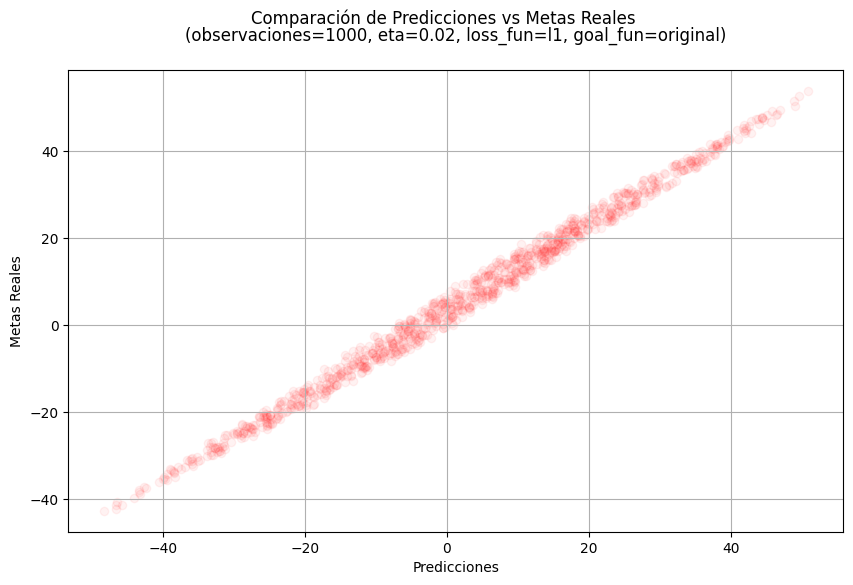

Pesos:  [[ 2.26971762]
 [-2.87173581]]
Sesgos:  [1.46462268]
Perdida:  3.4519958421423063
Tiempo de ejecución:  0.0079803466796875


In [73]:
loss_fun = "l1"
pesos, sesgos, perdida, execution_time = simpleLinearRegression(loss_fun=loss_fun)
print("Pesos: ", pesos)
print("Sesgos: ", sesgos)
print("Perdida: ", perdida)
print("Tiempo de ejecución: ", execution_time)

1. **Tiempo de ejecución**: Aunque el tiempo de ejecución se mantiene casi igual que en los casos anteriores (0.003 segundos), casi el mismo que el de el original L2-norm.

2. **Minimización de la pérdida**: La pérdida se minimiza de manera similar a lo visto en clase con la función L2-norm, pero alcanzando un valor final diferente y más alto de 3.4519. La función L1-norm tiende a producir soluciones más robustas frente a valores atípicos (outliers) en los datos.

3. **Pesos y sesgos**: Los pesos [ 2.2697, -2.8717] obtenidos están cerca a los vistos en clase con la función L2-norm estándar, aunque el sesgo de 1.4646 no tanto. 

4. **Resolución del problema**: El problema sí se resolvió efectivamente con esta tasa de aprendizaje, como lo indica la pérdida relativamente baja.

5. **Mejor resultado con más iteraciones**: Realizar más iteraciones mejora  ligeramente los resultados, pero no se obtienen mejoras significativas. La función L1-norm tiende a converger más rápido que la función L2-norm.

6. **Limitaciones:**  La función L1-norm tiende a ofrecer soluciones más dispersas (con más ruido)


## 4. Creación y Evaluación de una Nueva Función (Total: 25 puntos)

### 6. Cree una función f(x1, x2) = 13 * x1 + 7 * x2 - 12.

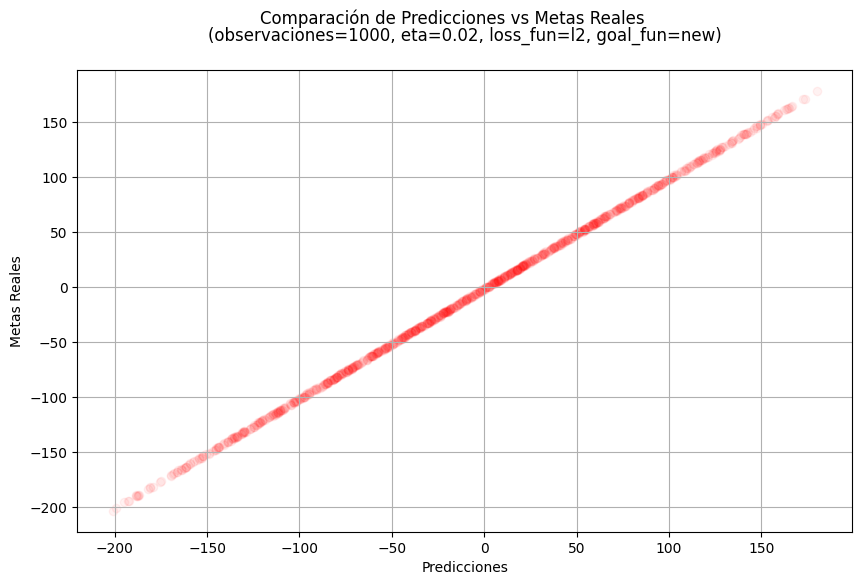

Pesos:  [[12.99110864]
 [ 6.99801183]]
Sesgos:  [-10.38495721]
Perdida:  1.5105821284805845
Tiempo de ejecución:  0.004790544509887695


In [77]:
goal_fun = "new"
pesos, sesgos, perdida, execution_time = simpleLinearRegression(goal_fun=goal_fun)
print("Pesos: ", pesos)
print("Sesgos: ", sesgos)
print("Perdida: ", perdida)
print("Tiempo de ejecución: ", execution_time)

1. **¿Funciona el algoritmo de la misma forma?**

Sí, el algoritmo funciona de manera similar al caso visto en clase con la función objetivo original f(x1, x2) = 2 * x1 - 3 * x2 + 5.

- Los pesos obtenidos son [12.9911, 6.9980], muy cercanos a los valores esperados de 13 y 7 para los coeficientes de x1 y x2, respectivamente, en la nueva función.
- El sesgo obtenido es -10.3849, cercano al valor esperado de -12 en la nueva función.
- La pérdida final es relativamente baja (1.5106), lo que indica que el algoritmo ha logrado minimizar la función de pérdida y ajustar los pesos y sesgos de manera adecuada para la nueva función objetivo.
- El tiempo de ejecución (0.0048 segundos) es similar al caso visto en clase, lo que sugiere que el algoritmo ha convergido en un número razonable de iteraciones.
- La gráfica de dispersión muestra una línea recta con una pendiente positiva, lo cual es consistente con la nueva función objetivo, donde los coeficientes de x1 y x2 son ambos positivos.

En conclusión, el algoritmo ha logrado ajustar los pesos y sesgos de manera adecuada para la nueva función objetivo, minimizando la función de pérdida y obteniendo resultados coherentes con la función objetivo. Esto demuestra que el algoritmo es capaz de adaptarse y converger correctamente para diferentes funciones objetivo lineales.